In [1]:
import tensorflow 
import keras
from  keras import layers
from keras.datasets import imdb
import numpy as np

nb_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=nb_words)

# get the word index and its reverse

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# get the actual review

In [3]:
def get_review_text(review):
   return " ".join([reverse_word_index.get(i - 3, "?") for i in review])

# print the actual review

In [4]:
print(get_review_text(train_data[6]))

? lavish production values and solid performances in this straightforward adaption of jane ? satirical classic about the marriage game within and between the classes in ? 18th century england northam and paltrow are a ? mixture as friends who must pass through ? and lies to discover that they love each other good humor is a ? virtue which goes a long way towards explaining the ? of the aged source material which has been toned down a bit in its harsh ? i liked the look of the film and how shots were set up and i thought it didn't rely too much on ? of head shots like most other films of the 80s and 90s do very good results


# define the one-hot encoding // The dimension is the number of words

In [5]:
def one_hot_encode(sequences,dimension):
    encodings = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
          encodings[i,j] = 1
    return encodings

# train a binary classification model

In [6]:
def train_the_binary_classification(model,inputs,outputs,val_inputs,val_outputs):
  model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["binary_accuracy"])
  return model.fit(inputs,outputs,epochs=20,batch_size=512,validation_data=(val_inputs,val_outputs))

In [7]:
print(len(train_data))

25000


# Define the training and validation data

In [ ]:
# Training Data: First 20,000 samples (80% of original training dataset)
partial_train_data = train_data[:20000]
partial_train_labels = train_labels[:20000]

# Validation Data: Last 5,000 samples (20% of original training dataset)
validation_data = train_data[20000:]
validation_labels = train_labels[20000:]

# Encode the data

In [9]:
train_encodings = one_hot_encode(partial_train_data, nb_words)
val_encodings = one_hot_encode(validation_data, nb_words)
test_encodings = one_hot_encode(test_data, nb_words)

# Define a great model 

In [10]:
input = keras.Input(shape=(nb_words,),name="data")
l1 = layers.Dense(64,activation="relu")(input)
l2 = layers.Dense(64,activation="relu")(l1)
output = layers.Dense(1,activation="sigmoid")(l2) 
model = keras.Model(inputs=input,outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 10000)]           0         
                                                                 
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________


# Train the binary classification with a validation set

In [11]:
history = train_the_binary_classification(model, train_encodings, partial_train_labels, val_encodings, validation_labels)

Epoch 1/20
40/40 [==============================] - 20s 54ms/step - loss: 0.4393 - binary_accuracy: 0.7976 - val_loss: 0.2935 - val_binary_accuracy: 0.8902
Epoch 2/20
40/40 [==============================] - 1s 20ms/step - loss: 0.2424 - binary_accuracy: 0.9077 - val_loss: 0.2848 - val_binary_accuracy: 0.8894
Epoch 3/20
40/40 [==============================] - 1s 26ms/step - loss: 0.1908 - binary_accuracy: 0.9265 - val_loss: 0.3552 - val_binary_accuracy: 0.8644
Epoch 4/20
40/40 [==============================] - 1s 24ms/step - loss: 0.1430 - binary_accuracy: 0.9482 - val_loss: 0.3058 - val_binary_accuracy: 0.8882
Epoch 5/20
40/40 [==============================] - 1s 20ms/step - loss: 0.1026 - binary_accuracy: 0.9635 - val_loss: 0.3388 - val_binary_accuracy: 0.8870
Epoch 6/20
40/40 [==============================] - 1s 25ms/step - loss: 0.0860 - binary_accuracy: 0.9686 - val_loss: 0.3880 - val_binary_accuracy: 0.8794
Epoch 7/20
40/40 [==============================] - 1s 31ms/step - lo

# Evaluate on the training data

In [12]:
train_loss, train_acc = model.evaluate(train_encodings, partial_train_labels)
print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}")

625/625 [==============================] - 18s 28ms/step - loss: 8.1381e-05 - binary_accuracy: 1.0000
Training Loss: 0.0001, Training Accuracy: 1.0000


# Evaluate on the Validation Data

In [13]:
val_loss, val_acc = model.evaluate(val_encodings, validation_labels)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

157/157 [==============================] - 7s 41ms/step - loss: 1.0018 - binary_accuracy: 0.8716
Validation Loss: 1.0018, Validation Accuracy: 0.8716


# Evaluate on the testing data

In [14]:
test_loss, test_acc = model.evaluate(test_encodings, test_labels)
print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_acc:.4f}")

782/782 [==============================] - 31s 40ms/step - loss: 1.0767 - binary_accuracy: 0.8576
Testing Loss: 1.0767, Testing Accuracy: 0.8576


# Plot the Training and Validation Losses

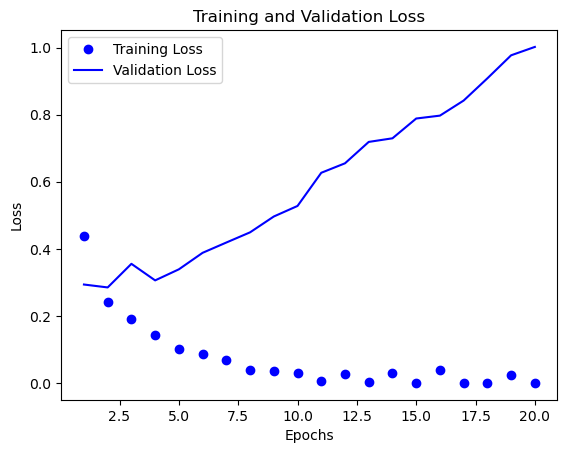

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range (1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()